# ANN and CNN on Hand-written digit recognition

In [ ]:
#######################################################################
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#######################################################################
(X_train , y_train) , (X_test, y_test ) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

60000
10000
60000
10000


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
# we can see the digit in the image(represented in numbers from 0 to 255)
for i in X_train[0]:
  for j in i:
    print(f'{j: < 5}',end = '')
  print()

 0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
 0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
 0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
 0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
 0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
 0    0    0    0    0    0    0    0    0    0    0    0    3    18   18   18   126  136  175  26   166  255  247  127  0    0    0    0   
 0    0    0    0    0    0    0    0    30   36   94   154  170  253  253  253  253  253  225  172  253  242  195  64   0    0    0    0   
 0    0    0 

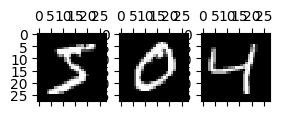

In [ ]:
#######################################################################
#ploting first trainning image
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 1))  # Set the figure size to (width, height)

plt.subplot(1, 3, 1)  # 1 row, 3 columns, first subplot
plt.matshow(X_train[0], cmap='gray', fignum=False)

plt.subplot(1, 3, 2)  # 1 row, 3 columns, second subplot
plt.matshow(X_train[1], cmap='gray', fignum=False)

plt.subplot(1, 3, 3)  # 1 row, 3 columns, third subplot
plt.matshow(X_train[2], cmap='gray', fignum=False)

plt.show()


In [ ]:
#######################################################################
#labels
print(y_train[0])
print(y_train[1])
print(y_train[2])

5
0
4


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
#######################################################################
#normalizing between 0 and 1
X_train = X_train / 255
X_test = X_test /255

In [ ]:
for i in X_train[0]:
  for j in i:
    print(f'{j: < 21}',end = '')
  print()

 0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                 
 0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0                  0.0        

In [ ]:

#######################################################################
#flattening the 2d array into 1d
x_train_flattened = X_train.reshape(len(X_train),28*28)
x_test_flattened = X_test.reshape(len(X_test),28*28)

In [ ]:
print(x_train_flattened.shape)
print(x_test_flattened.shape)

(60000, 784)
(10000, 784)


In [ ]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Artificial Neural Network

In [ ]:
####################################################################################################
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28*28,)) ,
    keras.layers.Dense(32, input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']
)

model.fit(x_train_flattened, y_train, epochs = 10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8407 - loss: 0.5781
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9410 - loss: 0.2005
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9535 - loss: 0.1571
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9620 - loss: 0.1310
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9675 - loss: 0.1103
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9718 - loss: 0.0942
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9755 - loss: 0.0808
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9757 - loss: 0.0788
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9791 - loss: 0.0680
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9802 - loss: 0.0633


In [ ]:
####################################################################################################
model.evaluate(x_test_flattened , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9648 - loss: 0.1233


[0.10726501792669296, 0.9689000248908997]

X_test[0] label is:  7



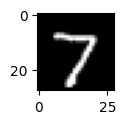

In [ ]:
####################################################################################################
# give the index what you want and show the digit ,then predict it with further code
index = 0
test_img = X_test[index]
print(f"X_test[{index}] label is: ",y_test[index])
print()
plt.figure(figsize=(1,1))
plt.imshow(test_img,cmap='gray')
plt.show()

####################################################################################################
#ANN Prediction


In [ ]:
y_predicted = model.predict(x_test_flattened)
np.argmax(y_predicted[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


7

In [ ]:
#for confusion matrix

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print(y_predicted_labels[:5])

[7, 2, 1, 0, 4]


In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    3,    0,    0,    0,    2,    1,    4,    0],
       [   0, 1118,    4,    2,    0,    1,    3,    1,    6,    0],
       [   4,    6,  992,    6,    3,    1,    3,    5,   11,    1],
       [   0,    0,    3,  982,    1,    7,    0,    6,    8,    3],
       [   1,    1,    2,    0,  946,    0,    7,    2,    6,   17],
       [   3,    2,    0,    9,    3,  862,    4,    1,    6,    2],
       [   7,    3,    2,    0,    3,    9,  930,    0,    4,    0],
       [   2,    9,    6,    7,    2,    0,    0,  982,    6,   14],
       [   6,    0,    3,    6,    4,    3,    4,    2,  945,    1],
       [   5,    5,    1,    6,   12,    6,    0,    5,    7,  962]],
      dtype=int32)>

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True ,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
# in black box are errors

#ANN all in one

In [ ]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values between 0 and 1
X_train = X_train / 255
X_test = X_test / 255

#Flatting 2d array into 1d
x_train_flattened = X_train.reshape(len(X_train),28*28)
x_test_flattened = X_test.reshape(len(X_test),28*28)

# Define the model architecture
model = Sequential()
model.add(Dense(128, input_dim=28*28 , activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(164, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train_flattened, y_train, epochs=10, batch_size=50)

# Evaluate the model on the test set
score = model.evaluate(x_test_flattened, y_test, verbose=0)
print('Test accuracy:', score[1])
print(score)

#CNN (All in one)

In [ ]:

import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist


(x_train,y_train) , (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

x_train = x_train / 255
x_test = x_test / 255

x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)
print(x_train_flattened.shape)
print(x_test_flattened.shape)



from keras.models import Sequential
from keras.layers import Dense
cnn_model = Sequential()
cnn_model.add(Dense(128,input_dim=28*28,activation='relu'))
cnn_model.add(Dense(164,activation='relu'))
cnn_model.add(Dense(64,activation='relu'))
cnn_model.add(Dense(64,activation='relu'))
cnn_model.add(Dense(10,activation='softmax'))

cnn_model.compile(loss='sparse_categorical_crossentropy' , optimizer='Adam' , metrics=['accuracy'])

history = cnn_model.fit(x_train_flattened,y_train,epochs=10)

score = cnn_model.evaluate(x_test_flattened,y_test)
print(score)



(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
(60000, 784)
(10000, 784)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8649 - loss: 0.4368
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9674 - loss: 0.1052
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9758 - loss: 0.0786
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9832 - loss: 0.0553
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9855 - loss: 0.0458
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9865 - loss: 0.0415
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9897 - loss: 0.0328
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9907 - loss: 0.0291
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9909 - loss: 0.0287
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.9936 - loss: 0.0214
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9741 - loss: 0.1184
[0.09899455308914185, 0.977999985218

#CNN predictions

In [ ]:
y_pred = cnn_model.predict(x_test_flattened)
print(y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[3.6897001e-16 7.0348996e-12 2.7642858e-12 ... 9.9999994e-01
  5.1507994e-16 3.1065660e-08]
 [1.8572565e-07 1.3098836e-09 9.9999958e-01 ... 1.6195656e-08
  1.6290326e-09 1.4538662e-09]
 [3.4391110e-08 9.9989599e-01 2.5859231e-06 ... 4.4831331e-06
  3.0885305e-05 8.5250831e-06]
 ...
 [1.0683014e-12 1.2174765e-09 9.1434913e-09 ... 1.0775108e-11
  7.2232872e-11 6.5096692e-08]
 [1.3229958e-15 4.7572323e-20 3.8547830e-15 ... 3.3466493e-18
  7.9466878e-07 4.9687867e-14]
 [5.9442679e-10 1.0137506e-14 3.8065491e-15 ... 4.4514358e-19
  9.2999577e-13 1.7245155e-12]]


In [ ]:
from sklearn.metrics import accuracy_score

y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)

Accuracy: 0.978






---



---



---



---


---



---




#Other way to make same architecture of cnn

In [ ]:
"""

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# model.fit(x_train, y_train, epochs=10)
history = model.fit(x_train_flattened,y_train,epochs=10)

score = model.evaluate(x_test_flattened,y_test)
print(score)
"""

# For my own image of digit

In [ ]:
def process_img(link):
  import cv2
  import numpy as np
  import matplotlib.pyplot as plt

  dig_img = cv2.imread(link)

  # Convert the image to grayscale
  gray_img = cv2.cvtColor(dig_img, cv2.COLOR_BGR2GRAY)

  inverted_img = 255 - gray_img

  resized_img = cv2.resize(inverted_img, (28, 28))

  resized_img = np.array(resized_img)

  plt.figure(figsize=(2,2))
  plt.imshow(resized_img,cmap='gray')
  plt.show()

  return resized_img


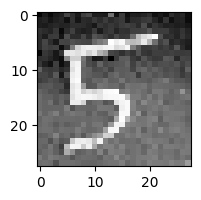

In [ ]:
my_img = process_img('/content/IMG-5.jpg')

In [ ]:
my_img_flattened = my_img.reshape(1,28*28)

# ANN model

In [ ]:
my_predicted = model.predict(my_img_flattened)

print(my_predicted)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
np.argmax(my_predicted[0])  # wrong prediction

2

# CNN model

In [ ]:
my_predicted = cnn_model.predict(my_img_flattened)

print(my_predicted)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [ ]:
np.argmax(my_predicted[0])   # right prediction

5

In [ ]:
"""  R E S U L T S

CNN typically outperforms ANN in terms of accuracy due to its ability to capture spatial hierarchies in image data.
ANN is faster to train but may not achieve the same level of accuracy as CNN, especially for image recognition tasks.

"""

In [ ]:
# we can increase the complexity of the model(ann and cnn) in order to get better results.